# **Importing Keras libraries**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Making Separate Dataset for Training and Testing**

In [4]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/archive/Dataset/Dataset/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/archive/Dataset/Dataset/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [5]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

# **Define the Parameters**

In [21]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

# **Model Building**

In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

# **Compiling the model**

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# **Fitting the Model**

In [8]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 92s 6s/step - loss: 0.5575 - accuracy: 0.6927 - val_loss: 0.1431 - val_accuracy: 0.9669
Epoch 2/10
14/14 [==============================] - 42s 3s/step - loss: 0.2447 - accuracy: 0.9014 - val_loss: 0.0662 - val_accuracy: 0.9917
Epoch 3/10
14/14 [==============================] - 40s 3s/step - loss: 0.2388 - accuracy: 0.9037 - val_loss: 0.1973 - val_accuracy: 0.9256
Epoch 4/10
14/14 [==============================] - 40s 3s/step - loss: 0.3580 - accuracy: 0.8739 - val_loss: 0.0724 - val_accuracy: 0.9917
Epoch 5/10
14/14 [==============================] - 44s 3s/step - loss: 0.2030 - accuracy: 0.9128 - val_loss: 0.0431 - val_accuracy: 0.9835
Epoch 6/10
14/14 [==============================] - 42s 3s/step - loss: 0.1660 - accuracy: 0.9381 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 39s 3s/step - loss: 0.1374 - accuracy: 0.9472 - val_loss: 0.0425 - val_accuracy: 0.9917
Epoch 8/10
14/14 [==

# **Predictions on Dataset**

In [9]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 8s 2s/step


In [10]:
predictions

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [11]:
print(len(predictions))

121


# **Plotting Loss per Iteration**

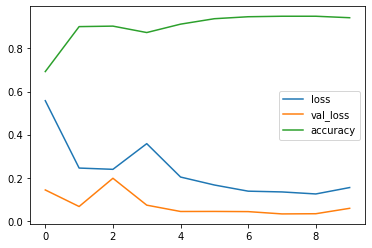

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

# **Plotting accuracy per Iteration**

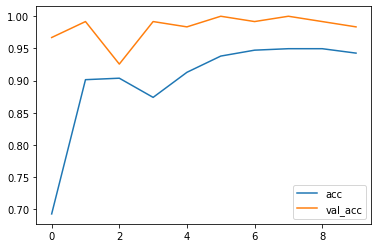

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# **Making a function to see any image from dataset with predicted label**

In [14]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("No Fire",fontsize=30)

1/1 [==============================] - 0s 126ms/step
[[1.]]


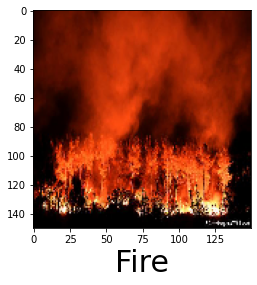

In [15]:
predictImage("/content/drive/MyDrive/archive/Dataset/Dataset/test_set/with fire/19464620_401.jpg")

1/1 [==============================] - 0s 37ms/step
[[0.]]


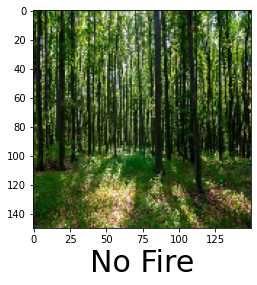

In [16]:
predictImage('/content/drive/MyDrive/archive/Dataset/Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg')

1/1 [==============================] - 0s 33ms/step
[[1.]]


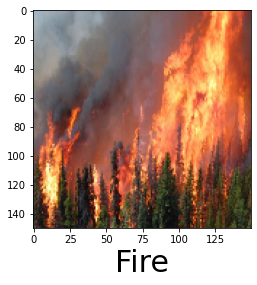

In [17]:
predictImage('/content/drive/MyDrive/archive/Dataset/Dataset/train_set/with fire/with fire (100).jpg')

1/1 [==============================] - 0s 64ms/step
[[0.]]


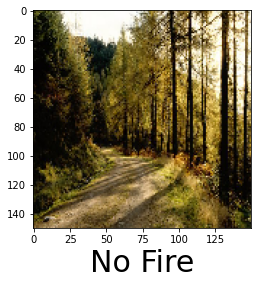

In [19]:
predictImage('/content/drive/MyDrive/archive/Dataset/Dataset/test_set/forest/1009821.jpg')